In [1]:
# Import libraries for data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import libraries for linear regression
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
data = datasets.load_boston()   # Boston dataset is a built in dataset in sklearn
data.data  # Boston data is in the form of array and we'll convert it into a data frame for further visualization

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
# In housing.csv which is the same dataset as the boston dataset, the names of the columns were not given, we can add
# columns by ourselves as shown below

# column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# data = pd.read_csv('/Users/shauryaluthra/Desktop/Projects/Boston Home Prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)

# For this project we have used the inbuilt Boston dataset but a housing.csv dataset is present which can also be used

In [4]:
boston = pd.DataFrame(data.data, columns = data.feature_names)  # Typecasting arrays data into dataframe

In [5]:
boston.sample(5)   # Displaying 5 random values from the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74


In [6]:
boston['TARGET'] = data.target # As seen from above the prices of houses are not displayed. Using this command we'll
# display the housing prices in 1000 dollars as seen below

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# The data dictionary is given as follows

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# TARGET - Median value of owner-occupied homes in $1000's

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TARGET     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
boston.isnull().sum() # Tells the number of null values in each column. As seen there are no null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# From above we see, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned
# for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract
# bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both 
# variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in
# regression task which is to predict the TARGET variable

In [13]:
boston.shape 

(506, 14)

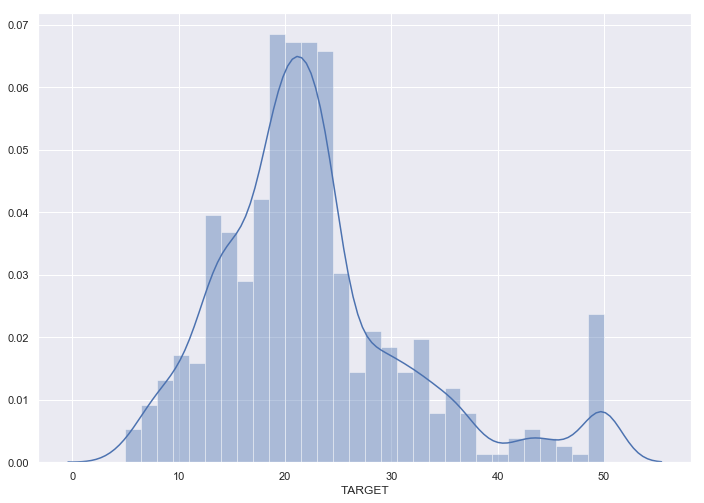

In [14]:
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
sns.distplot(boston['TARGET'], bins = 30)
plt.show()

In [15]:
# Clearly the TARGET variable is distributed with a very few outliers

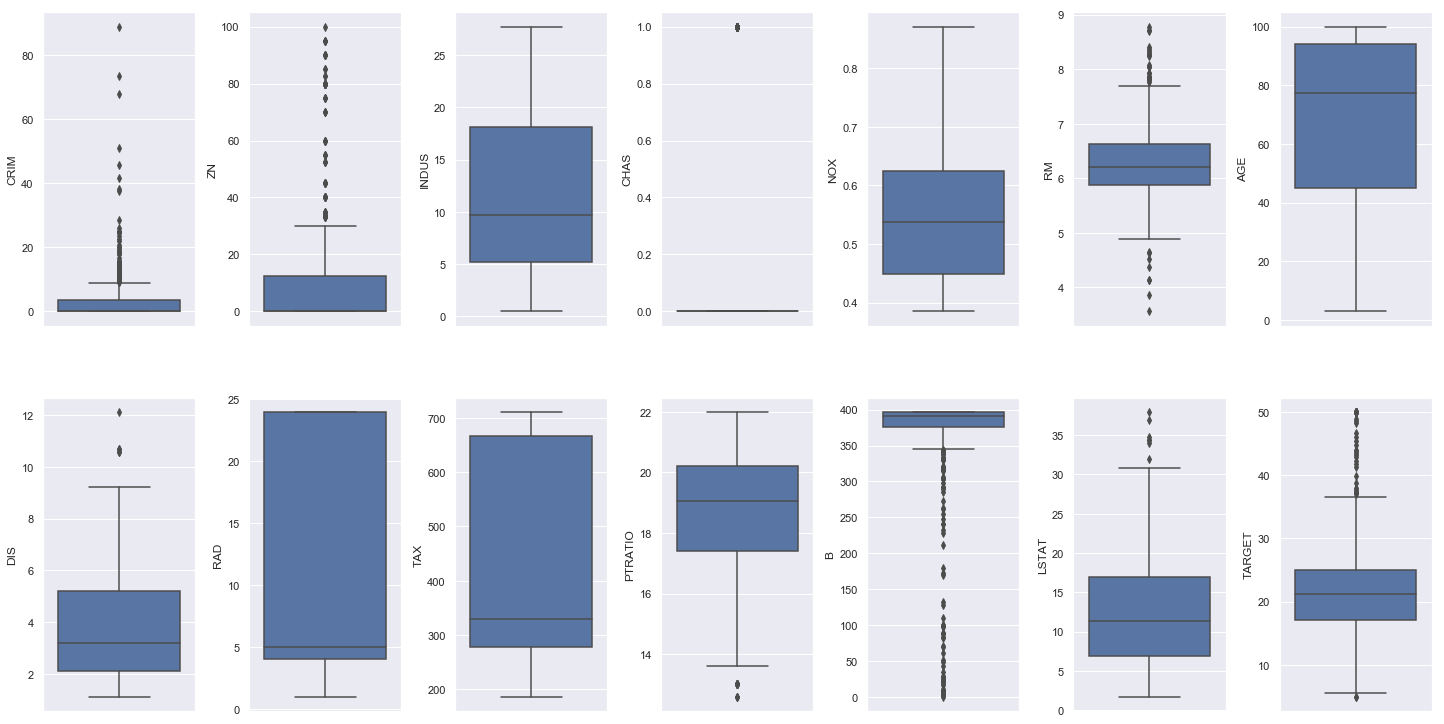

In [16]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten() 
# The flatten() function is used to get a copy of an given array collapsed into one dimension. It is a numpy function
for k, v in boston.items():
    sns.boxplot(y = k, data = boston, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0) 
# tight_layout helps plots to fit into a figure nicely, pad is used for padding between the figure edge and the edges
# of subplots, as a fraction of the font size, h_pad and w_pad are used for Padding (height/width) between edges of
# adjacent subplots, as a fraction of the font size. 

In [17]:
# From the above plot it seems that columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers 
# percentage in every column.

In [18]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the 
# first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively. IQR denotes the
# inter quartile range

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
TARGET       7.975000
dtype: float64


In [19]:
# Another interesing fact on the dataset is the max value of TARGET. From the original data description, it says: 
# Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values 
# above 50.00 may not help to predict the TARGET variable and hence we remove that variable. 

In [20]:
boston['TARGET'].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
        ..
12.3     1
37.6     1
29.4     1
12.6     1
22.1     1
31.1     1
48.3     1
26.2     1
11.0     1
9.5      1
12.0     1
17.7     1
44.8     1
35.1     1
32.4     1
42.3     1
28.2     1
31.2     1
33.3     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: TARGET, Length: 229, dtype: int64

In [21]:
# Clearly there are 16 values with TARGET as 50.00. We'll remove all thode 16 records

In [22]:
boston = boston.drop(boston[boston.TARGET >= 50].index) # Dropping rows where value of TARGET variable is 50.00

In [23]:
boston.shape # Clearly 16 records have been removed and 490 records are left

(490, 14)

In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


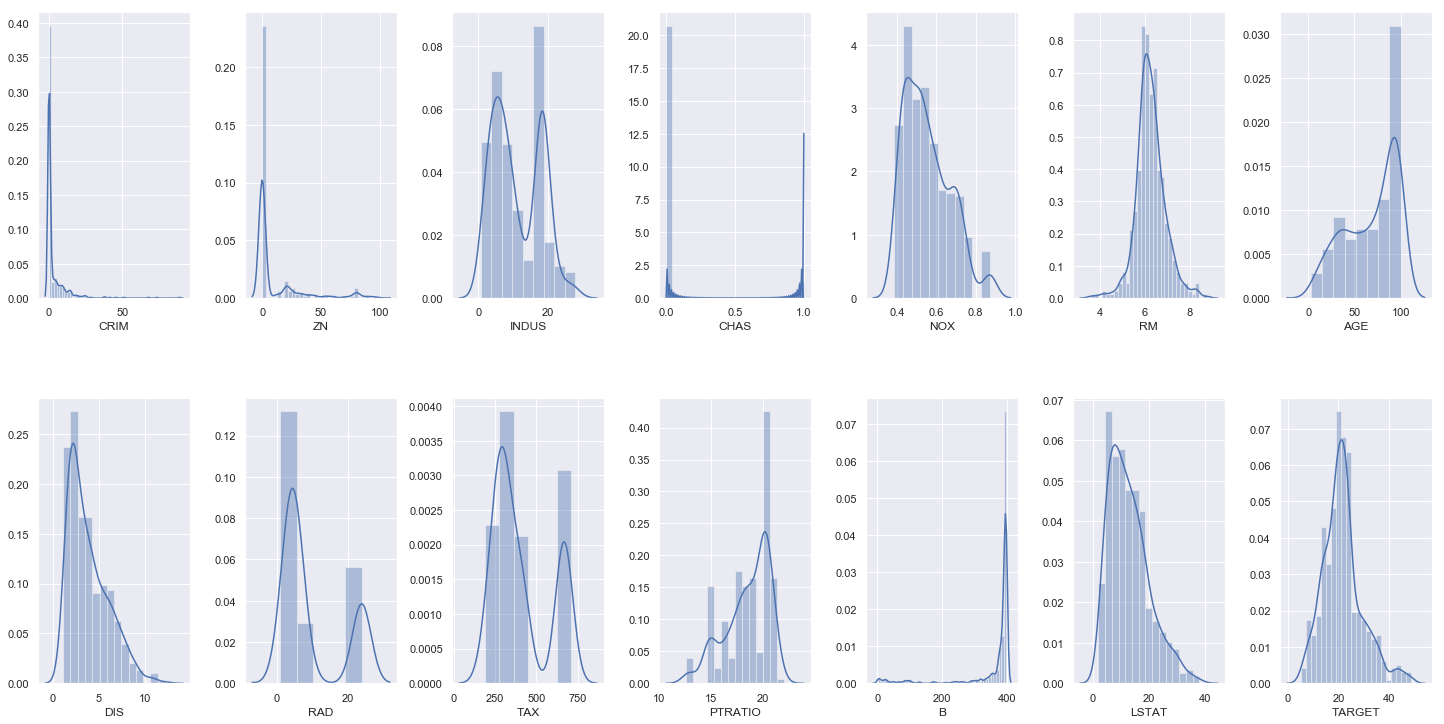

In [25]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten()
for k, v in boston.items():
    sns.distplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)
# Refer to their meaning in above code

In [26]:
# The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also TARGET variable looks to 
# have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data 
# except CHAS which is a discrete variable

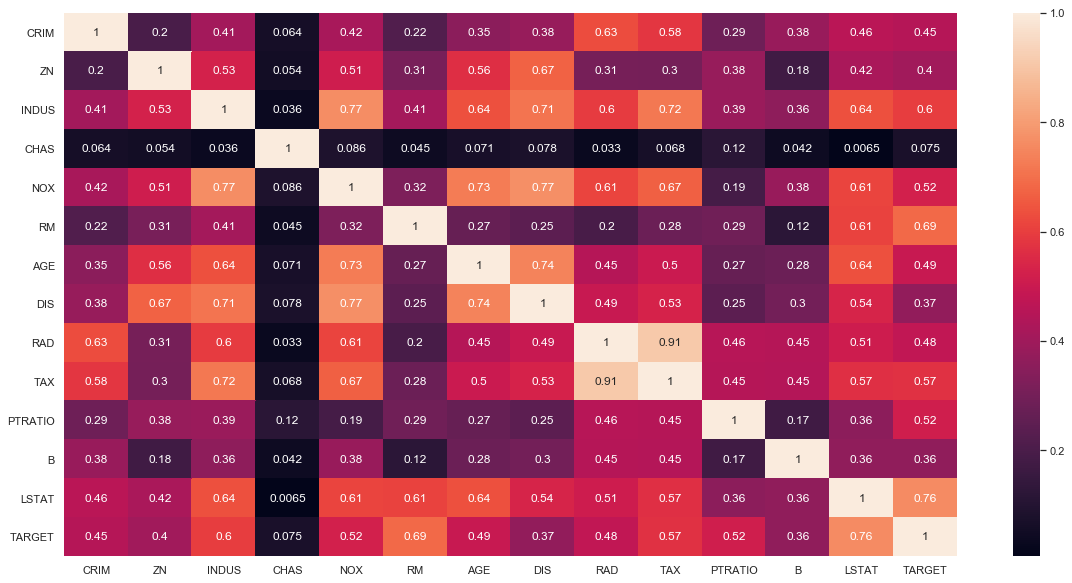

In [27]:
plt.figure(figsize = (20, 10))
sns.heatmap(boston.corr().abs(), annot = True) 
# boston.corr() is to create a correlation matrix. It measures the linear relationships between the variables. The 
# correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the 
# heatmap function from the seaborn library to plot the correlation matrix. 

# abs() is used so that absolute values are printed in the heatmap. If we remove abs() we would get negative values
# in the squares of heatmap

# annot = True to print the values inside the square of heatmap

In [28]:
# From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX,
# PTRAIO has a correlation score above 0.5 with TARGET variable which is a good indication of using as predictors.
# Let's plot these columns against TARGET.  

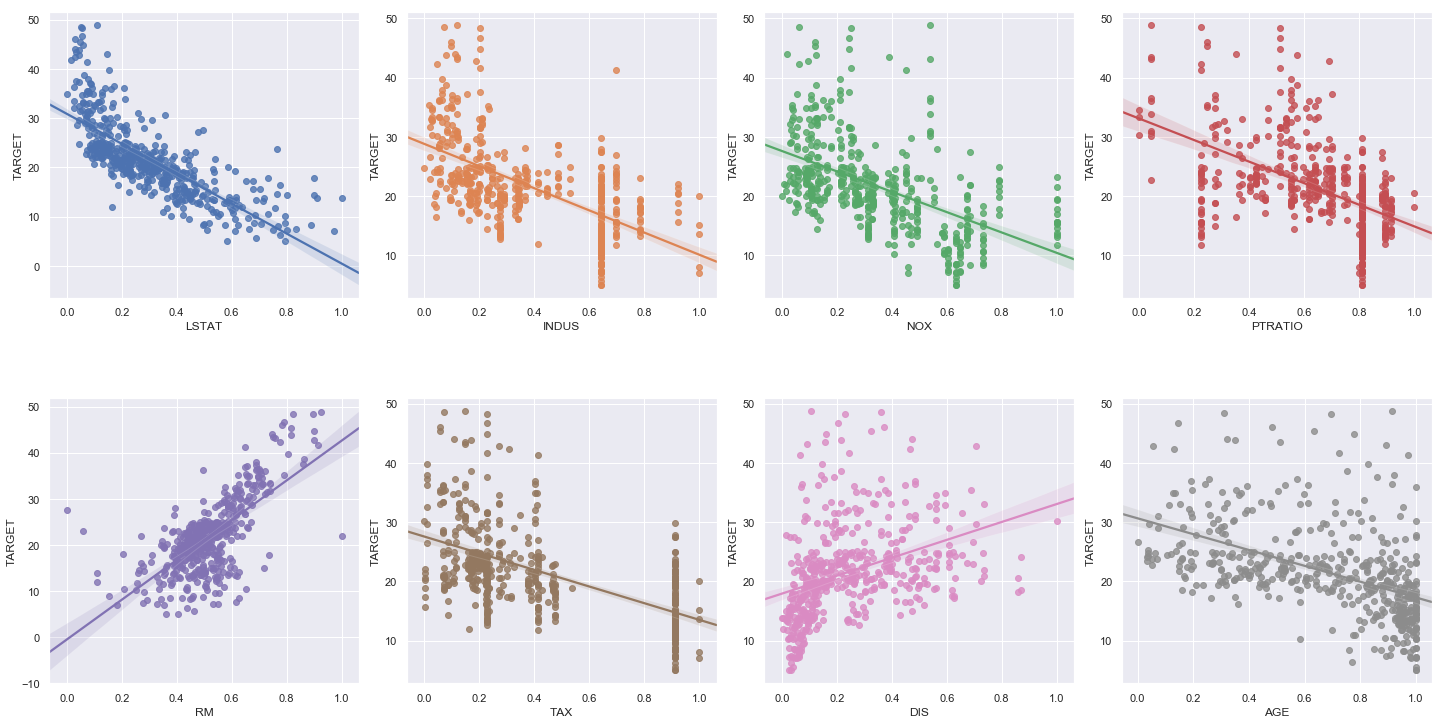

In [29]:
# We'll first scale the columns before plotting them against the TARGET variable
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
# We have not taken these columns --> CRIM, ZN, B because of their highly skewed distributions as seen from above 
# histogram plots
x = boston.loc[:, column_sels]
y = boston['TARGET']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = column_sels)
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i])
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [30]:
# So with these analsis, we may try predict TARGET with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'
# features. Let's try to remove the skewness of the data trough log transformation.

In [31]:
# Log transformation
# The log transformation is, arguably, the most popular among the different types of transformations used to 
# transform skewed data to approximately conform to normality. If the original data follows a log-normal 
# distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

# Now what is log normal distribution
# In probability theory, a log-normal distribution is a continuous probability distribution of a random variable 
# whose logarithm is normally distributed.
# https://www.investopedia.com/terms/l/log-normal-distribution.asp --> refer this link to understand log normal 
# distribution better

# Normal distribution is the Gaussian distribution

In [32]:
# Log transformation
y = np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.01:
        x[col] = np.log1p(x[col])

In [33]:
# It is difficult to measure the quality of a given model without quantifying its performance over training and 
# testing. This is typically done using some type of performance metric, whether it is through calculating some type 
# of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the 
# coefficient of determination, R^2, to quantify your model's performance. The coefficient of determination for a model
# is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

# The values for R^2 range from 0 to 1, which captures the percentage of squared correlation between the predicted 
# and actual values of the target variable. A model with an R^2 of 0 always fails to predict the target variable, 
# whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what 
# percentage of the target variable, using this model, can be explained by the features. A model can be given a 
# negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the 
# target variable.

# To calculate the score we do the following

In [34]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict) # Calculates and returns the performance score between true and predicted values
    return score

In [35]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [36]:
corrmat = boston.corr()

In [37]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr_Value'])
    return df

In [38]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['TARGET'], threshold)
corr_value

,Corr_Value
INDUS,-0.600005
NOX,-0.524451
RM,0.686634
TAX,-0.572442
PTRATIO,-0.518641
LSTAT,-0.759837
TARGET,1.000000


In [39]:
features = boston.drop(['CRIM', 'ZN', 'CHAS', 'RAD', 'B', 'AGE', 'DIS'], axis = 1)

In [40]:
prices = boston['TARGET']
features = features.drop(['TARGET'], axis = 1)

In [41]:
def scatter_plot(feature, target):
    plt.figure(figsize = (16, 8))
    plt.scatter(features[feature], prices, c = 'black')
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

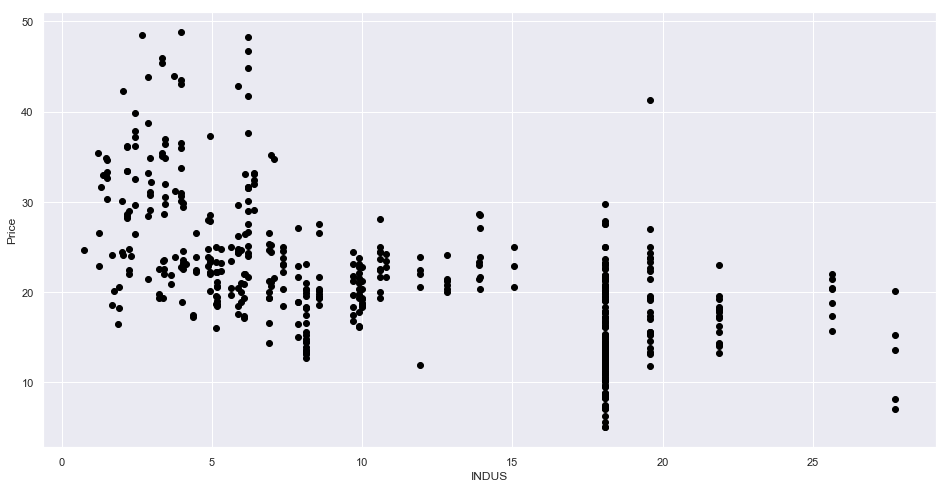

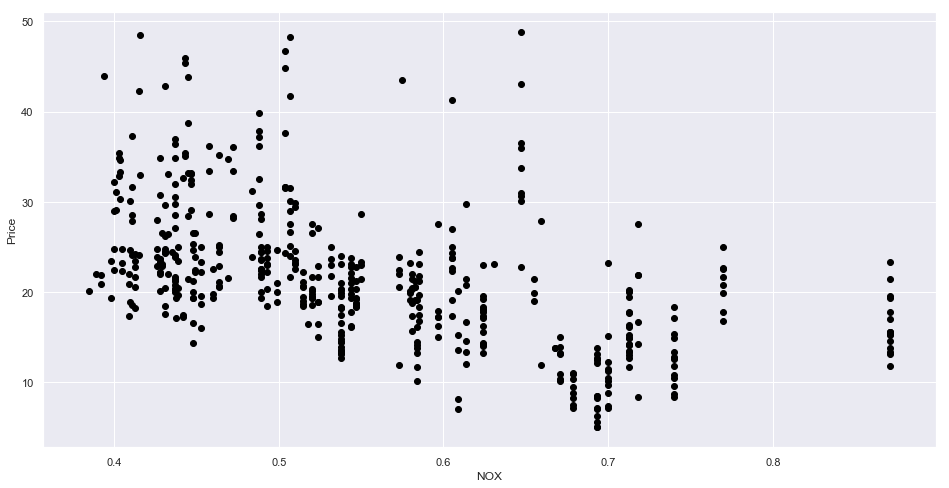

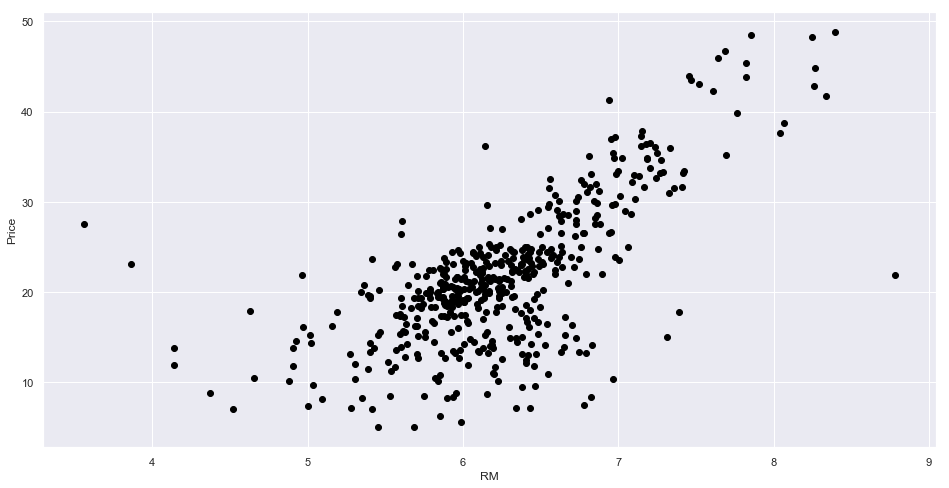

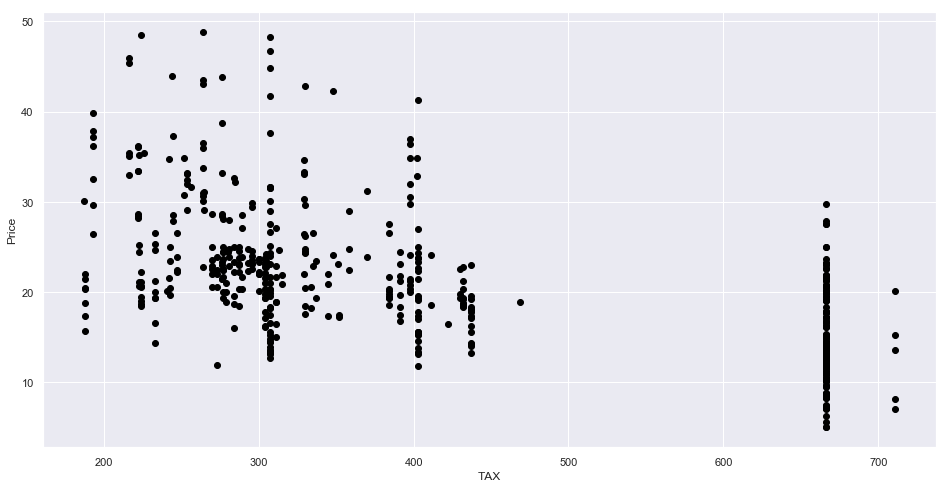

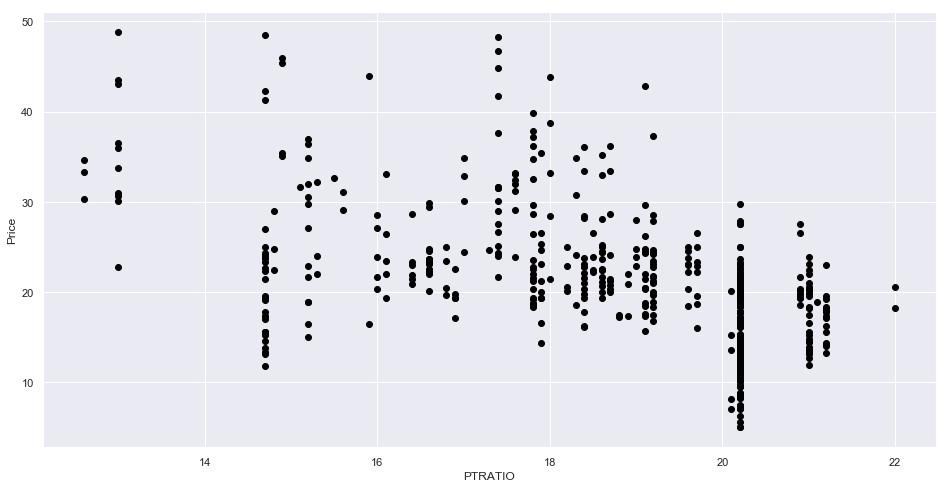

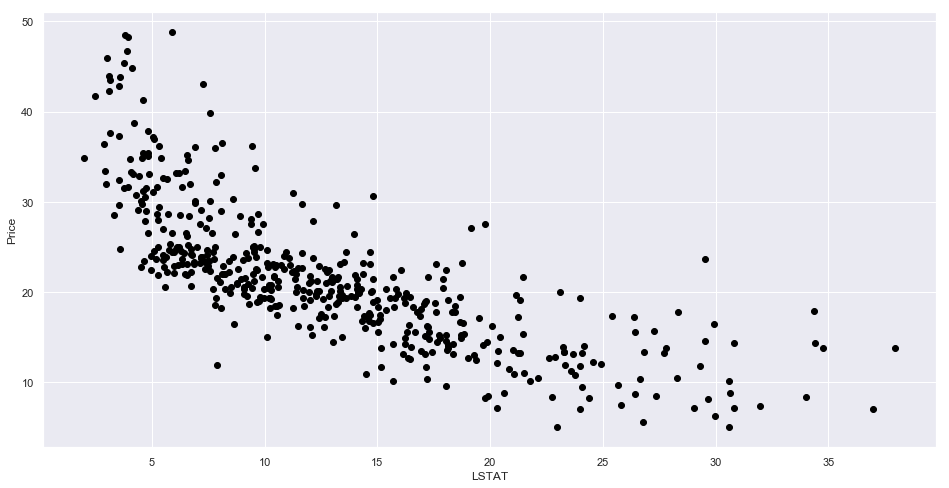

In [42]:
scatter_plot('INDUS', 'TARGET')
scatter_plot('NOX', 'TARGET')
scatter_plot('RM', 'TARGET')
scatter_plot('TAX', 'TARGET')
scatter_plot('PTRATIO', 'TARGET')
scatter_plot('LSTAT', 'TARGET')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.3, random_state = 10)

# train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run
# it without specifying random_state, you will get a different result, this is expected behavior.

# On the other hand if you use random_state = some_number, then you can guarantee that the output of Run 1 will be 
# equal to the output of Run 2, i.e. your split will be always the same. It doesn't matter what the actual random_state
# number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always get the same output the
# first time you make the split. This is useful if you want reproducible results, for example in the documentation,
# so that everybody can consistently see the same numbers when they run the examples. In practice I would say, you 
# should set the random_state to some fixed number while you test stuff, but then remove it in production if you 
# really need a random (and not a fixed) split.

In [44]:
# We'll check if the split is actually correct
print(features.shape)
print(float(X_train.shape[0])/float(features.shape[0]))
print(float(X_test.shape[0])/float(features.shape[0]))

(490, 6)
0.7
0.3


In [45]:
# We can see the dataset is split into 70% training data and 30% test data

In [46]:
features.shape

(490, 6)

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

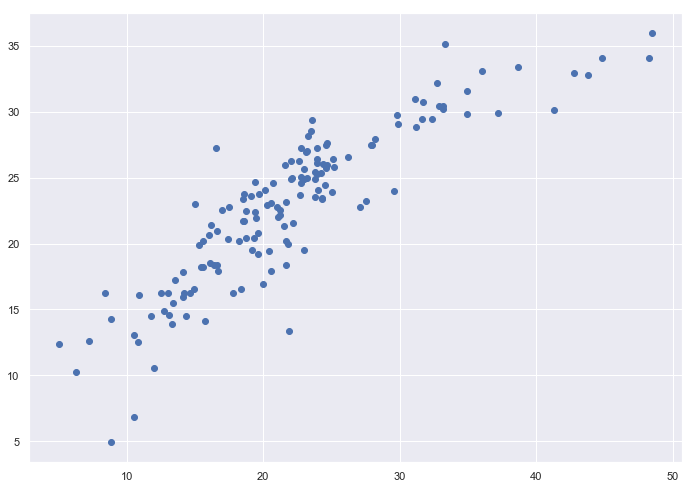

In [48]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

In [49]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
df2 = df1.head(10)
df2

,Actual,Predicted
142,13.4,15.496128
199,34.9,29.855476
152,15.3,19.906894
310,16.1,18.488226
47,16.6,20.917742
342,16.5,27.249996
176,23.2,24.975050
326,23.0,24.921753
178,29.9,29.059644
431,14.1,17.869104


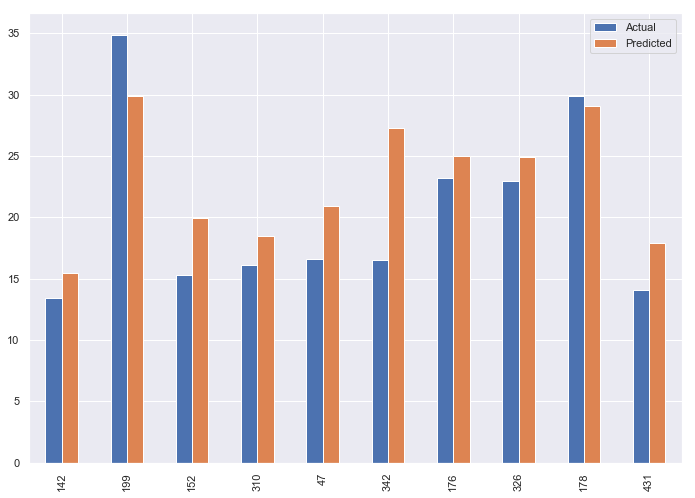

In [50]:
df2.plot(kind = 'bar')

In [51]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R squared error', r2_score(y_test, predictions)) 
# r2_score is for regression problems whereas accuracy_score is for classification problem

('MAE', 3.13835606500449)
('MSE', 16.493047143887342)
('RMSE', 4.061163274714197)
('R squared error', 0.7445138996643956)


In [52]:
features.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000
mean,11.113143,0.554307,6.245471,408.002041,18.520000,12.92402
std,6.821302,0.116688,0.653147,168.065190,2.110478,7.08318
min,0.740000,0.385000,3.561000,187.000000,12.600000,1.98000
25%,5.190000,0.449000,5.881000,280.250000,17.400000,7.34750
50%,9.690000,0.538000,6.185000,330.000000,19.100000,11.67500
75%,18.100000,0.624000,6.578000,666.000000,20.200000,17.11750
max,27.740000,0.871000,8.780000,711.000000,22.000000,37.97000


In [53]:
features.sample(5)

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
59,5.13,0.453,5.927,284.0,19.7,9.22
249,5.86,0.431,6.718,330.0,19.1,6.56
328,3.24,0.460,5.868,430.0,16.9,9.97
365,18.10,0.718,3.561,666.0,20.2,7.12
315,9.90,0.544,5.705,304.0,18.4,11.50


In [54]:
house_price = [[1.25, 0.429, 6.939, 335, 19.7, 5.89]]
pred = lm.predict(house_price)
print(int(round(pred[0] * 1000)))

27290
